### Calculate the gradient

In [5]:
import numpy as np

# Define a function
def f(x):
    return x**2 + 2 * np.sin(x)

# Define the points at which to compute the gradient
x = np.array([[-1, 0, 1],[2,3,4]])  # Example points

# Define the step size for finite differences
h = 1e-6

# Compute the gradient numerically using finite differences
gradient = (f(x + h) - f(x - h)) / (2 * h)

# Print the function values and gradient
print("x:", x)
print("Function values:", f(x))
print("Numerical Gradient:", gradient)

x: [[-1  0  1]
 [ 2  3  4]]
Function values: [[-0.68294197  0.          2.68294197]
 [ 5.81859485  9.28224002 14.48639501]]
Numerical Gradient: [[-0.91939539  2.          3.08060461]
 [ 3.16770633  4.02001501  6.69271276]]


In [4]:
import numpy as np

np.random.seed(1) # keep the orginal array shape

inp_neuron = 3
out_neuron = 1
hidden_neuron = 4

w1 = np.random.rand(inp_neuron, hidden_neuron)
w2 = np.random.rand(hidden_neuron, out_neuron)

def sigmoid(x):
    return 1/(1+np.exp(-x)) # np.exp(m): return An array with exponential of all elements of input array.
        
def analytic_grad(x, y):
        
    global w1, w2
    
    hid = sigmoid(np.matmul(x, w1)) # np.matmul(m1,m2): returns the matrix product of two arrays
    out = np.matmul(hid, w2)
        
    loss = ((y - out)**2)/2
    out_delta = (out - y)
                            
    hid_error = np.matmul(out_delta, w2.T)
    hid_delta = hid_error*hid*(1-hid)
                          
    grad_w2 = np.matmul(hid.T, out_delta)  
    grad_w1 = np.matmul(x.T, hid_delta) 
        
    return grad_w1

def loss(x, y, w1, w2):
                            
    hid = sigmoid(np.matmul(x, w1))
    out = np.matmul(hid, w2)
    loss = ((y - out)**2)/2
    return loss    
    
    
def numeric_grad(x, y):
        
    h = 0.0001
    global w1, w2
    
    w1[0,0] += h
    loss_h = loss(x, y, w1, w2)   # f(a+h)
        
    w1[0,0] -= h
    loss_ = loss(x, y, w1, w2)    # f(a)
        
    grad = (loss_h - loss_)/h     # (f(a+h)-f(a)) / h
    return grad

x = np.array([[1,2,3]])
y = np.array([6])

print("Analytic gradient for weight w1", analytic_grad(x, y))
print("Numeric gradient for weight w1:", numeric_grad(x, y))

Analytic gradient for weight w1 [[-0.10051075 -0.26272135 -0.01630413 -0.12590926]
 [-0.2010215  -0.5254427  -0.03260825 -0.25181852]
 [-0.30153225 -0.78816405 -0.04891238 -0.37772778]]
Numeric gradient for weight w1: [[-0.100507]]


In [2]:
inp_neuron = 3
out_neuron = 1
hidden_neuron = 4

x = np.array([[1,2,3]])
y = np.array([6])

def sigmoid(x):
    return 1/(1+np.exp(-x))

# defining weight matrices
w1 = np.random.rand(inp_neuron, hidden_neuron)
w2 = np.random.rand(hidden_neuron, out_neuron)

# calculating activations
hid = sigmoid(np.matmul(x, w1))    
out = np.matmul(hid, w2)           
        
# defining loss function    
loss = ((y - out)**2)/2

# calculating the gredients of loss w.r.t weights
out_delta = (out - y)                         
hid_error = np.matmul(out_delta, w2.T)
hid_delta = hid_error*hid*(1-hid)                         
grad_w2 = np.matmul(hid.T, out_delta)  
grad_w1 = np.matmul(x.T, hid_delta) 

print("gradients of w1:\n\n", grad_w1)

gradients of w1:

 [[-0.00723209 -0.02216027 -0.0866869  -0.24917071]
 [-0.01446418 -0.04432054 -0.1733738  -0.49834142]
 [-0.02169628 -0.06648081 -0.26006069 -0.74751213]]


# Gradient Descent: `θj := θj - α * ∂J(θ) / ∂θj`
1. `y_pred = w * x + b`
2. `J(w, b) = (1/N) * ∑(y_pred - y)^2`


Algorithm:

        1. Initialize the parameters
        2. Compute the cost function
        3. Compute the gradients
           3.1. Compute the partial derivative of the cost function with respect to w: 
           ∂J/∂w = (2/N) * ∑(y_pred - y) * x
           3.2 Compute the partial derivative of the cost function with respect to b: 
           ∂J/∂b = (2/N) * ∑(y_pred - y)
        4. Update the parameters
                - w := w - α * ∂J/∂w
                - b := b - α * ∂J/∂b
        5. Repeat steps 2-4

In [56]:
import numpy as np
np.random.seed(100)

In [9]:

# Gradient Descent for linear regression
# yhat= wx+b
#loss= (y-yhat)**2/N
#initialize some parameters
N,D=10,2
x= np.random.rand(N,D) # d= R*C
y= 2*x + np.random.rand() # actual value

#parameters
w= np.random.randn(D)
b= 0.00

# hypoparameter
learning_rate=0.01

def descend(x,y,w,b,learning_rate):
    dldw=0.0
    dldb=0.0
    N=x.shape[0]
    for xi, yi in zip(x,y):
        dldw +=-(2*xi.dot(yi-(w.T*xi+b)))
        dldb +=-np.sum(2*(yi-(w.T*xi+b)))

    w= w - learning_rate*(1/N)*dldw #  # in batch gradient descent update happens only one time
    b= b - learning_rate*(1/N)*dldb
    return w,b
        
for epoch in range(4):
    w,b=descend(x,y,w,b,learning_rate)
    yhat=w.T*x+b
    loss=np.divide(np.sum((y-yhat)**2, axis=0), x.shape[0])
    print(f"{epoch}  loss is {loss} parameters w={w} and b={b}")

0  loss is [6.64559454 3.30360334] parameters w=[-1.657925   -0.23209242] and b=0.0859398545802357
1  loss is [6.124358   2.93982681] parameters w=[-1.60855432 -0.18272174] and b=0.1674272802013969
2  loss is [5.65034317 2.61532209] parameters w=[-1.56142246 -0.13558988] and b=0.24468661048841578
3  loss is [5.21910698 2.32605026] parameters w=[-1.51641744 -0.09058486] and b=0.3179308924846992


In [90]:
import random
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta
b,theta=initialize(3)
print("Bias: ",b,"Weights: ",theta)

Bias:  0.025472330267818477 Weights:  [0.66148097 0.09849288 0.58086275]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('../dataset/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [21]:
X=df[['TV','radio','newspaper']]
Y=df['sales']
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
print(X.head())

         TV     radio  newspaper
0  0.967425  0.979066   1.774493
1 -1.194379  1.080097   0.667903
2 -1.512360  1.524637   1.779084
3  0.051919  1.214806   1.283185
4  0.393196 -0.839507   1.278593


In [22]:
import random
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta
b,theta=initialize(3)
print('Bias: ',b,'Weights: ',theta)

Bias:  0.655920614759266 Weights:  [0.49896821 0.1340551  0.63560361]


In [23]:
def predict_Y(b,theta,X):
    return b + np.dot(X,theta)
Y_hat=predict_Y(b,theta,X)
Y_hat[0:10]

array([ 2.39775733,  0.62927738,  1.23647886,  1.66027477,  1.55225104,
        1.38051924,  0.01575034, -0.08633362, -1.20230092,  0.50296306])

In [24]:
import math
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

0.9767079433751067

In [25]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    '''
    x,y : the input and output variable
    y_hat: predicted value with current bias and weights
    b_0,theta_0: current bias and weights
    Learning rate: learning rate to adjust the update step
    '''
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
get_cost(Y,Y_hat)

After initialization -Bias:  0.655920614759266 theta:  [0.49896821 0.1340551  0.63560361]
After first update -Bias:  0.6428022024640807 theta:  [0.50374229 0.13783112 0.62599112]


0.9767079433751067

In [26]:
def run_gradient_descent(X,Y, alpha, num_iterations):
    b,theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for each_iter in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        # print(b, theta)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
            result_idx=result_idx+1
        iter_num +=1
    print(b)
    print("Final Estimate of b and theta : ",b,theta)
    return gd_iterations_df,b,theta
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)
print(gd_iterations_df)

0.5333926789832796
Final Estimate of b and theta :  0.5333926789832796 [0.57500064 0.72406737 0.16976378]
    iteration      cost
0         0.0  1.031564
1        10.0  0.992611
2        20.0  0.955321
3        30.0  0.919620
4        40.0  0.885440
5        50.0  0.852714
6        60.0  0.821379
7        70.0  0.791376
8        80.0  0.762646
9        90.0  0.735134
10      100.0  0.708787
11      110.0  0.683556
12      120.0  0.659392
13      130.0  0.636249
14      140.0  0.614083
15      150.0  0.592852
16      160.0  0.572516
17      170.0  0.553036
18      180.0  0.534376
19      190.0  0.516501


Text(0, 0.5, 'Cost or MSE')

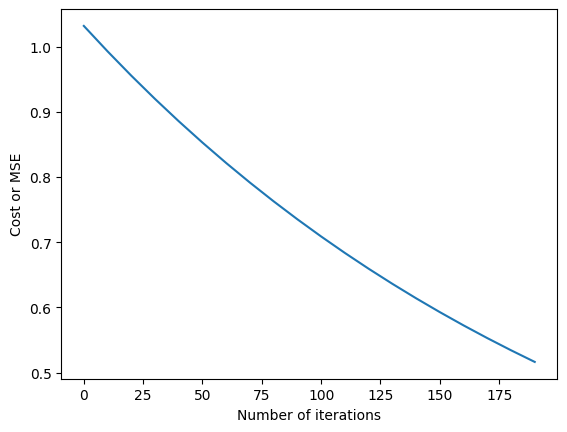

In [27]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost or MSE')

-4.0298443389490436e-17
Final Estimate of b and theta :  -4.0298443389490436e-17 [ 0.75306591  0.53648155 -0.00433069]
0.0012072287941551911
Final Estimate of b and theta :  0.0012072287941551911 [0.74285042 0.48489848 0.05106122]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

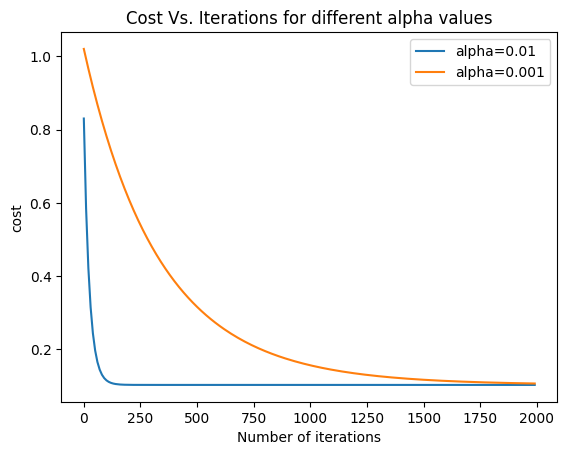

In [28]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label='alpha=0.01')
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label='alpha=0.001')
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')